# Encode & Decode for single block

takes a 16x16x3 matrix, corresponding to a Macroblock of the image

Outputs the result of the DCT transformation and Quantization

In [1]:
import numpy as np
import sys
import cv2
import scipy.fftpack as fft
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import empty,arange,exp,real,imag,pi
from numpy.fft import rfft,irfft

In [2]:
img_name = 'Add.png'
#img_name = 'cameraman.png'
src = cv2.imread(img_name,1)[:16,:16]

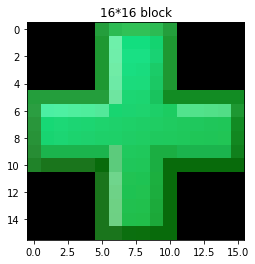

In [3]:
plt.title('16*16 block')
plt.imshow(src)

In [4]:
# Split bgr color channels
blue,green,red = cv2.split(src)
gray = cv2.cvtColor(src , cv2.COLOR_BGR2GRAY) # Convert color form BGR to Gray

In [5]:
# Convert color form BGR to Y_Cr_Cb
YCrCb = cv2.cvtColor(src , cv2.COLOR_RGB2YCR_CB)
# Split Y_Cb_Cr channelsx
Y,Cb,Cr = cv2.split(YCrCb)

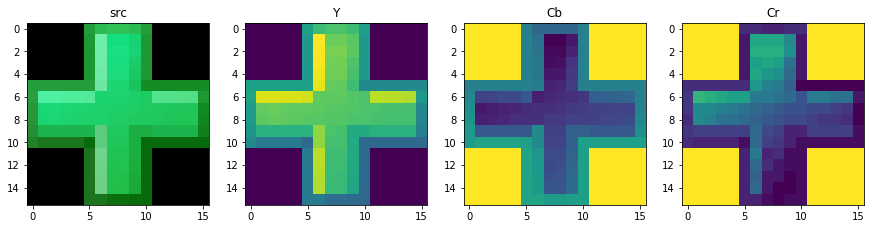

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.title('src')
plt.imshow(src)
plt.subplot(142)
plt.title('Y')
plt.imshow(Y)
plt.subplot(143)
plt.title('Cb')
plt.imshow(Cb)
plt.subplot(144)
plt.title('Cr')
plt.imshow(Cr)

In [7]:
# The strategy of subsampling is to keep the top left pixel for each 2x2 block
# We can also compute the mean of 2x2 block, the let it be the summary of the small block
def subsample(src):
    tmp = []
    for i in range(0,len(src),2):
        #print(i)
        #print(Cb[i])
        #print(Cb[i][::2])
        tmp.append(src[i][::2])
        #print(tmp)
    tmp = np.array(tmp)
    return tmp

In [8]:
Y1 = Y[:8,:8]
Y2 = Y[:8,8:]
Y3 = Y[8:,:8]
Y4 = Y[8:,8:]
subsample_Cb = subsample(Cb)
subsample_Cr = subsample(Cr)

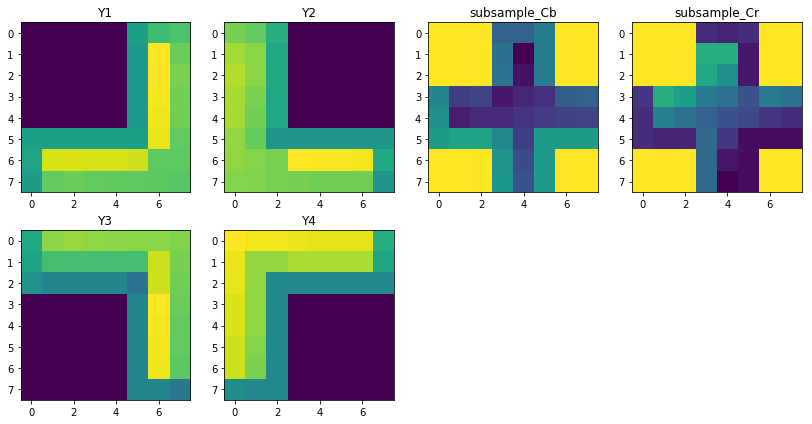

In [9]:
plt.figure(figsize=(14,7))
plt.subplot(241)
plt.title('Y1')
plt.imshow(Y1)
plt.subplot(242)
plt.title('Y2')
plt.imshow(Y2)
plt.subplot(243)
plt.title('subsample_Cb')
plt.imshow(subsample_Cb)
plt.subplot(244)
plt.title('subsample_Cr')
plt.imshow(subsample_Cr)
plt.subplot(245)
plt.title('Y3')
plt.imshow(Y3)
plt.subplot(246)
plt.title('Y4')
plt.imshow(Y4)

In [10]:
def dct(y):
    F = fft.dct(fft.dct(y, axis=0, norm='ortho', type=2), axis=1, norm='ortho', type=2)
    #F[0,0]=F[0,0]/64.
    return F
def idct(y):
    #F[0,0]=F[0,0]*64
    return fft.idct(fft.idct(y, axis=0, norm='ortho', type=2), axis=1, norm='ortho', type=2)

In [11]:
dct2_Y1 = dct(Y1)
dct2_Y2 = dct(Y2)
dct2_Y3 = dct(Y3)
dct2_Y4 = dct(Y4)
dct2_Cb = dct(subsample_Cb)
dct2_Cr = dct(subsample_Cr)

In [12]:
dct2_Y1

array([[  6.99750000e+02,  -3.35348737e+02,   1.31377086e+02,
         -3.04739953e+00,  -1.03500000e+02,   6.05659323e+01,
         -2.38405911e+01,  -1.39939598e+01],
       [ -3.09614405e+02,  -1.81399766e+02,   1.17724898e+02,
          2.79423371e+01,  -3.23646559e+01,   4.58216797e+01,
          1.23194052e+01,  -1.25649752e+01],
       [  1.21942966e+02,   1.00525874e+02,  -7.47517857e+01,
         -1.15207174e+01,   2.03337986e+01,  -4.54742780e+01,
          1.86776695e+01,  -1.25004193e+01],
       [  1.36344832e+01,   2.68849955e+01,  -4.87574365e+00,
          1.98814768e+00,   1.15333329e+01,  -3.00803214e+00,
          2.38709645e+00,   2.09535593e+00],
       [ -1.00000000e+02,  -4.12940145e+01,   2.44680428e+01,
          6.61863408e+00,  -4.25000000e+00,   8.76631883e-01,
          1.53012215e+01,  -1.15803525e+01],
       [  5.77053477e+01,   3.80026238e+01,  -3.87724844e+01,
         -4.19001266e+00,   3.73531361e+00,  -2.50746738e+01,
          1.20074492e+01,  -1.1

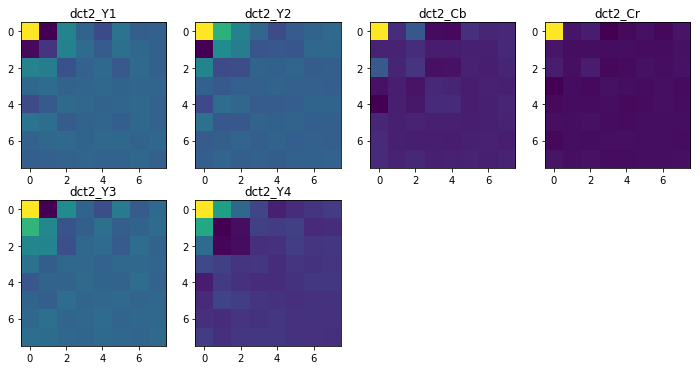

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(241)
plt.title('dct2_Y1')
plt.imshow(dct2_Y1)
plt.subplot(242)
plt.title('dct2_Y2')
plt.imshow(dct2_Y2)
plt.subplot(243)
plt.title('dct2_Cb')
plt.imshow(dct2_Cb)
plt.subplot(244)
plt.title('dct2_Cr')
plt.imshow(dct2_Cr)
plt.subplot(245)
plt.title('dct2_Y3')
plt.imshow(dct2_Y3)
plt.subplot(246)
plt.title('dct2_Y4')
plt.imshow(dct2_Y4)

In [14]:
# Define quantization matrix
# Source: https://en.wikipedia.org/wiki/MPEG-1#Quantization
quantization_matrix = np.matrix('16 11 10 16 24 40 51 61;12 12 14 19 26 58 60 55;14 13 16 24 40 57 69 56;14 17 22 29 51 87 80 62;18 22 37 56 68 109 103 77;24 35 55 64 81 104 113 92;49 64 78 87 103 121 120 101;72 92 95 98 112 100 103 99')
quantization_matrix

matrix([[ 16,  11,  10,  16,  24,  40,  51,  61],
        [ 12,  12,  14,  19,  26,  58,  60,  55],
        [ 14,  13,  16,  24,  40,  57,  69,  56],
        [ 14,  17,  22,  29,  51,  87,  80,  62],
        [ 18,  22,  37,  56,  68, 109, 103,  77],
        [ 24,  35,  55,  64,  81, 104, 113,  92],
        [ 49,  64,  78,  87, 103, 121, 120, 101],
        [ 72,  92,  95,  98, 112, 100, 103,  99]])

In [49]:
# Quantization function
def quantize(F,QF):
    quant_matrix=np.ceil(quantization_matrix*QF)
    #print(quant_matrix)
    quant_matrix[quant_matrix>255]=255
    #print(F,quant_matrix)
    return (F/quant_matrix).astype(np.int)

In [16]:
# manual way
def quantize1(F,QF):
    quant_matrix=np.ceil(quantization_matrix*QF)
    quant_matrix[quant_matrix>255]=255
    tmp = []
    for i in range(8):
        for j in range(8):
            #print(quant_matrix.A[i][j])
            tmp.append(int(round(F[i][j]/quant_matrix.A[i][j])))
    print(np.array(tmp).reshape(8,8))

In [17]:
QF = 1 ######## CHANGE THIS TO CONTROL QUALITY. Recommend [0.1, 2]#######
qtz_Y1 = quantize(dct2_Y1,QF) 
qtz_Y2 = quantize(dct2_Y2,QF) 
qtz_Y3 = quantize(dct2_Y3,QF) 
qtz_Y4 = quantize(dct2_Y4,QF) 
qtz_Cb = quantize(dct2_Cb,QF) 
qtz_Cr = quantize(dct2_Cr,QF) 

In [18]:
print(dct2_Y1)

[[  6.99750000e+02  -3.35348737e+02   1.31377086e+02  -3.04739953e+00
   -1.03500000e+02   6.05659323e+01  -2.38405911e+01  -1.39939598e+01]
 [ -3.09614405e+02  -1.81399766e+02   1.17724898e+02   2.79423371e+01
   -3.23646559e+01   4.58216797e+01   1.23194052e+01  -1.25649752e+01]
 [  1.21942966e+02   1.00525874e+02  -7.47517857e+01  -1.15207174e+01
    2.03337986e+01  -4.54742780e+01   1.86776695e+01  -1.25004193e+01]
 [  1.36344832e+01   2.68849955e+01  -4.87574365e+00   1.98814768e+00
    1.15333329e+01  -3.00803214e+00   2.38709645e+00   2.09535593e+00]
 [ -1.00000000e+02  -4.12940145e+01   2.44680428e+01   6.61863408e+00
   -4.25000000e+00   8.76631883e-01   1.53012215e+01  -1.15803525e+01]
 [  5.77053477e+01   3.80026238e+01  -3.87724844e+01  -4.19001266e+00
    3.73531361e+00  -2.50746738e+01   1.20074492e+01  -1.10414114e+01]
 [ -9.37952678e+00   1.34499141e+01   1.66776695e+01   1.77209259e-01
    1.51194952e+01   9.32438852e+00  -4.74821433e+00   1.02847178e+01]
 [ -2.1470656

In [19]:
qtz_Cb

matrix([[45,  2, 14, -3, -2,  0,  0,  0],
        [ 0,  0,  2,  0,  0,  0,  0,  0],
        [10,  0,  2, -1,  0,  0,  0,  0],
        [-2,  0, -1,  0,  0,  0,  0,  0],
        [-3,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0]])

In [20]:
# takes a series of integers, returns the number of prefix 0s
def prefix_0(s):
    if len(s)==0:
        return 0
    i=0
    count = 0
    while s[i]==0 :
        count+=1
        #print(i,len(s)-1)
        if i==len(s)-1:
            return count
        i+=1
    return count

In [21]:
# This is an array of indices that we use to sample a flattened DCT array in zigzag order.
zz_indices = [ 0,  1,  8, 16,  9,  2,  3, 10,
               17, 24, 32, 25, 18, 11, 4,  5,
               12, 19, 26, 33, 40, 48, 41, 34,
               27, 20, 13,  6,  7, 14, 21, 28,
               35, 42, 49, 56, 57, 50, 43, 36,
               29, 22, 15, 23, 30, 37, 44, 51,
               58, 59, 52, 45, 38, 31, 39, 46,
               53, 60, 61, 54, 47, 55, 62, 63]

In [22]:
# convert the flattened list to the zigzaged order
zz_series = [qtz_Y1.A1[i] for i in zz_indices]
print(len(zz_series))
print(zz_series)

64
[43, -30, -25, 8, -15, 13, 0, 8, 7, 0, -5, 1, -4, 1, -4, 1, -1, 0, 0, -1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [23]:
# process the middle part -- <run, level>
# takes a list of numbers
# return a list of <run, level> pair
def run_level(tmp):
    encoded_string = []
    while True:
        #print(tmp)
        a = prefix_0(tmp)
        #print(a,len(tmp))
        if a==len(tmp):
            break
        #print([a,tmp[a]])
        encoded_string.append([a,tmp[a]])
        tmp = tmp[a+1:]
    return encoded_string

In [24]:
# takes a zigzag series of coeffs
# returns a list, in the form <DC term> <run, level> <EOB>
def zigzag_from_flattened_block(tmp):
    encoded_string = [tmp[0]]
    encoded_string += run_level(tmp[1:])
    encoded_string.append('EOB')
    return encoded_string

In [25]:
# takes a list, in the form <DC term> <run, level> <EOB>
# returns a zigzag series of coeffs
def zigzag_to_flattened_block(encoded_string):
    rst = [encoded_string[0]]
    for i in encoded_string[1:-1]:
        #print(i)
        for _ in range(i[0]):
            rst.append(0)
        rst.append(i[1])
    #print(16-len(rst))
    for i in range(64-len(rst)):
        rst.append(0)
    return rst

In [26]:
# a simple example of encoding and decoding
tmp = [1,2,0,0,1,0,0,0,2,0,3,0,0,0,0,0]
encoded = zigzag_from_flattened_block(tmp)
decoded = zigzag_to_flattened_block(encoded)
print(tmp)
print(encoded)
print(decoded) #decoded list has extra zeros because it only works for 8x8 blocks, but this example has less elements.

[1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[1, [0, 2], [2, 1], [3, 2], [1, 3], 'EOB']
[1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [27]:
# encoding and decoding Y1
print(zz_series,len(zz_series),"\n")
encoded = zigzag_from_flattened_block(zz_series)
print(encoded,"\n")
decoded = zigzag_to_flattened_block(encoded)
print(decoded,len(decoded))

[43, -30, -25, 8, -15, 13, 0, 8, 7, 0, -5, 1, -4, 1, -4, 1, -1, 0, 0, -1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 64 

[43, [0, -30], [0, -25], [0, 8], [0, -15], [0, 13], [1, 8], [0, 7], [1, -5], [0, 1], [0, -4], [0, 1], [0, -4], [0, 1], [0, -1], [2, -1], [0, 2], [1, 1], 'EOB'] 

[43, -30, -25, 8, -15, 13, 0, 8, 7, 0, -5, 1, -4, 1, -4, 1, -1, 0, 0, -1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 64


In [28]:
reversed_zz_indices = [0, 1, 5, 6, 14,15,27,28,
                       2, 4, 7, 13,16,26,29,42,
                       3, 8, 12,17,25,30,41,43,
                       9, 11,18,24,31,40,44,53,
                       10,19,23,32,39,45,52,54,
                       20,22,33,38,46,51,55,60,
                       21,34,37,47,50,56,59,61,
                       35,36,48,49,57,58,62,63]

In [29]:
qtz_Y1

matrix([[ 43, -30,  13,   0,  -4,   1,   0,   0],
        [-25, -15,   8,   1,  -1,   0,   0,   0],
        [  8,   7,  -4,   0,   0,   0,   0,   0],
        [  0,   1,   0,   0,   0,   0,   0,   0],
        [ -5,  -1,   0,   0,   0,   0,   0,   0],
        [  2,   1,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0]])

In [30]:
de_flattened = np.array([decoded[i] for i in reversed_zz_indices]).reshape(8,8)

In [31]:
### doesn't correct. don't know why ###
def de_quantize(F):
    quant_matrix=np.ceil(quantization_matrix*QF)
    #print(quant_matrix)
    quant_matrix[quant_matrix>255]=255
    print(quant_matrix)
    print(F)
    return (F*quant_matrix).astype(np.int)

In [32]:
# manual way
def de_quantize1(F,QF):
    quant_matrix=np.ceil(quantization_matrix*QF)
    quant_matrix[quant_matrix>255]=255
    tmp = []
    for i in range(8):
        for j in range(8):
            #print(quant_matrix.A[i][j])
            tmp.append(int(F[i][j]*quant_matrix.A[i][j]))
    return np.array(tmp).reshape(8,8)

In [33]:
de_quantized = de_quantize1(de_flattened,QF)
de_quantized


array([[ 688, -330,  130,    0,  -96,   40,    0,    0],
       [-300, -180,  112,   19,  -26,    0,    0,    0],
       [ 112,   91,  -64,    0,    0,    0,    0,    0],
       [   0,   17,    0,    0,    0,    0,    0,    0],
       [ -90,  -22,    0,    0,    0,    0,    0,    0],
       [  48,   35,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0]])

In [34]:
### compared to original dct matrix ###
dct2_Y1.astype(int)

array([[ 699, -335,  131,   -3, -103,   60,  -23,  -13],
       [-309, -181,  117,   27,  -32,   45,   12,  -12],
       [ 121,  100,  -74,  -11,   20,  -45,   18,  -12],
       [  13,   26,   -4,    1,   11,   -3,    2,    2],
       [-100,  -41,   24,    6,   -4,    0,   15,  -11],
       [  57,   38,  -38,   -4,    3,  -25,   12,  -11],
       [  -9,   13,   16,    0,   15,    9,   -4,   10],
       [ -21,  -17,   -7,    1,   -9,  -11,   12,  -13]])

In [35]:
# the ultimate goal here is to regenerate the original picture

In [36]:
regenerated = idct(de_quantized).astype(int)
regenerated

array([[ -5,   4,   2, -15,   8,  94, 147, 129],
       [ -9,  -1,  -1, -14,  13, 106, 168, 157],
       [  5,  10,   7,  -7,  19, 110, 176, 171],
       [  0,   3,   1, -11,  11,  97, 162, 160],
       [  3,  10,  16,   9,  27, 100, 155, 153],
       [ 87,  96, 105,  95,  95, 137, 168, 153],
       [144, 157, 173, 163, 146, 162, 168, 141],
       [109, 129, 158, 158, 143, 152, 151, 120]])

In [37]:
### compared to original Y matrix ###
Y1

array([[  0,   0,   0,   0,   0, 110, 132, 138],
       [  0,   0,   0,   0,   0, 104, 193, 150],
       [  0,   0,   0,   0,   0, 104, 192, 154],
       [  0,   0,   0,   0,   0, 104, 191, 152],
       [  0,   0,   0,   0,   0, 104, 189, 151],
       [110, 110, 110, 110, 110, 110, 186, 147],
       [113, 182, 183, 181, 181, 179, 145, 145],
       [107, 147, 149, 147, 146, 145, 144, 143]], dtype=uint8)

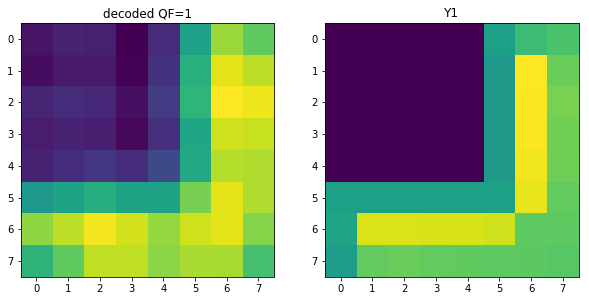

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('decoded QF={}'.format(QF))
plt.imshow(regenerated)
plt.subplot(122)
plt.title('Y1')
plt.imshow(Y1)

In [39]:
def rescue_code(function):
    import inspect
    get_ipython().set_next_input("".join(inspect.getsourcelines(function)[0]))

In [40]:
img_name = 'Add.png'
src = cv2.imread(img_name,1)[:16,:16]

In [52]:
def encode(src,QF):
    YCrCb = cv2.cvtColor(src , cv2.COLOR_RGB2YCR_CB)
    Y,Cb,Cr = cv2.split(YCrCb)

    Y1 = Y[:8,:8]
    Y2 = Y[:8,8:]
    Y3 = Y[8:,:8]
    Y4 = Y[8:,8:]
    subsample_Cb = subsample(Cb)
    subsample_Cr = subsample(Cr)
    
    def dct_quantize_zz(F):
        dct2_F = dct(F)
        #print(dct2_F)
        qtz_F = quantize(dct2_F,QF)
        zz_series = [qtz_F.A1[i] for i in zz_indices]
        encoded = zigzag_from_flattened_block(zz_series)
        return encoded
    
    return [dct_quantize_zz(Y1),dct_quantize_zz(Y2),dct_quantize_zz(Y3),dct_quantize_zz(Y4),
            dct_quantize_zz(subsample_Cb),dct_quantize_zz(subsample_Cr)]

In [54]:
encoded = encode(src,0.1)
print(encoded)

[[349, [0, -167], [0, -154], [0, 60], [0, -90], [0, 131], [0, -1], [0, 58], [0, 50], [0, 6], [0, -50], [0, 13], [0, -37], [0, 13], [0, -34], [0, 15], [0, -10], [0, -3], [0, -1], [0, -13], [0, 19], [0, -1], [0, 9], [0, 6], [1, 5], [0, 7], [0, -3], [0, -1], [0, 2], [0, -7], [0, 1], [0, 1], [0, -6], [0, 1], [0, -2], [0, -1], [0, 2], [3, 2], [0, -2], [0, -2], [6, 1], [0, -2], [0, 1], [1, -1], [0, 1], [2, -1], [1, -1], [1, 1], [0, -1], 'EOB'], [317, [0, 153], [0, -140], [0, 66], [0, 81], [0, 121], [0, 10], [0, 53], [0, -36], [0, 1], [0, -38], [0, -11], [0, -31], [0, -17], [0, -22], [0, -4], [0, -10], [0, 2], [1, 15], [0, 20], [0, -3], [0, -8], [0, 5], [2, -5], [0, 1], [0, 4], [0, 5], [0, 3], [0, 2], [0, -2], [0, -5], [2, 1], [0, 2], [0, 1], [0, -2], [1, -1], [0, 4], [9, 1], [1, 1], 'EOB'], [291, [0, -145], [0, 142], [0, 54], [0, 58], [0, 133], [0, -4], [0, -32], [0, 50], [0, 19], [0, -27], [0, -16], [0, -38], [0, -14], [0, -27], [0, 17], [0, 10], [2, -2], [0, -3], [1, -7], [0, -3], [0, -1],

In [ ]:
def decode(encoded,QF)
    decoded = zigzag_to_flattened_block(encoded)

    de_flattened = np.array([decoded[i] for i in reversed_zz_indices]).reshape(8,8)

    de_quantized = de_quantize1(de_flattened,QF)

    regenerated = idct(de_quantized).astype(int)
    return regenerated